In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test_orig) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test_orig, 10)



In [8]:
model = keras.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}\nTest loss: {test_loss:.4f}')


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.7976 - loss: 0.7155 - val_accuracy: 0.9547 - val_loss: 0.1619
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9490 - loss: 0.1788 - val_accuracy: 0.9732 - val_loss: 0.1006
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9671 - loss: 0.1085 - val_accuracy: 0.9792 - val_loss: 0.0758
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9786 - loss: 0.0751 - val_accuracy: 0.9822 - val_loss: 0.0604
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9833 - loss: 0.0576 - val_accuracy: 0.9863 - val_loss: 0.0517
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9871 - loss: 0.0455 - val_accuracy: 0.9862 - val_loss: 0.0481
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9893 - loss: 0.0356 - val_accuracy: 0.9873 - val_loss: 0.0459
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9898 - loss: 0.0339 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


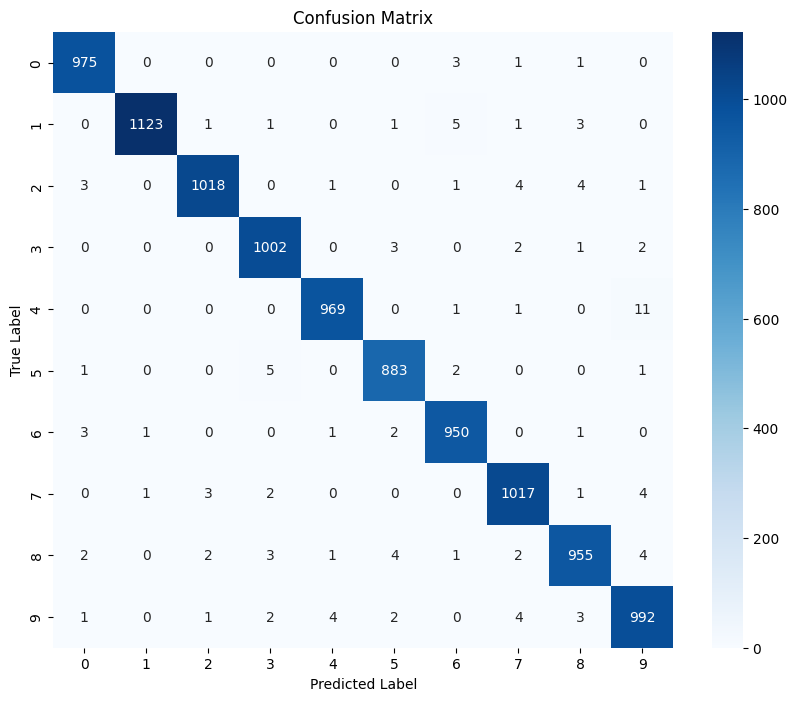

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Построение confusion matrix
confusion_mtx = confusion_matrix(y_test_orig, y_pred_classes)

# Визуализация confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

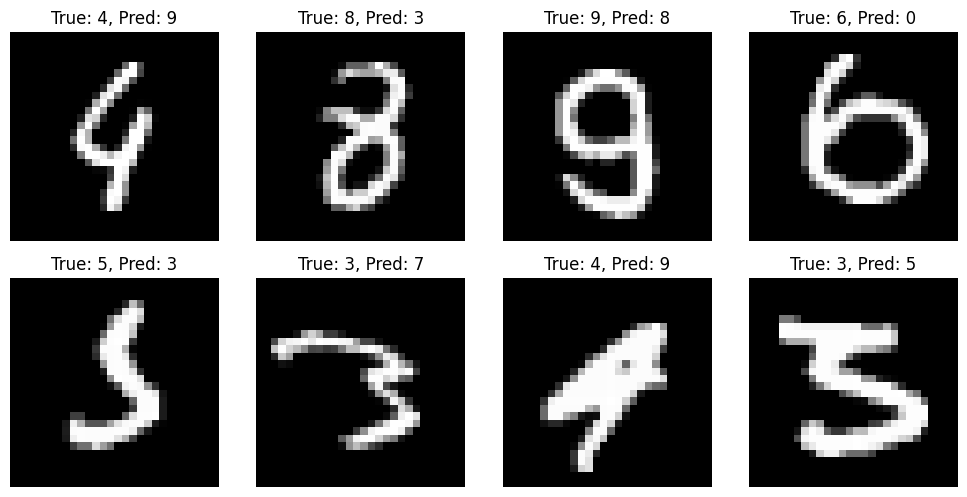

In [18]:
errors = (y_pred_classes != y_test_orig)
error_images = x_test[errors]
error_preds = y_pred_classes[errors]
true_labels = y_test_orig[errors]

plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(error_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[i]}, Pred: {error_preds[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()